**Supervised Learning**


```
Gaussian Process Regression
```



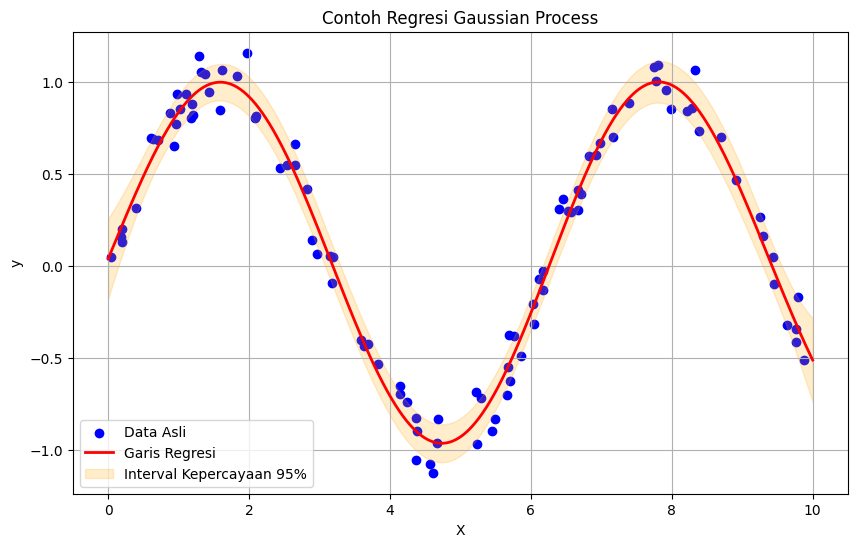

In [6]:
# Impor librarynya
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Data buatan untuk contoh regresi dgn random
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, 100)


kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

model.fit(X, y)

# Prediksi menggunakan data uji
x_pred = np.linspace(0, 10, 1000)[:, np.newaxis]
y_pred, sigma = model.predict(x_pred, return_std=True)

# Memplotkan hasil regresi
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(x_pred, y_pred, color='red', linewidth=2, label='Garis Regresi')
plt.fill_between(x_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='orange', label='Interval Kepercayaan 95%')
plt.title('Contoh Regresi Gaussian Process')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


**Unsupervised Learning**


```
Genetic Algorithms (GA)
```



<ipython-input-7-441aa2ce3c97>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring_crossover[idx, gene_idx] += random_value


Best solution: [-0.00633997 -0.00405835]
Best solution fitness: 0.011240747458494127


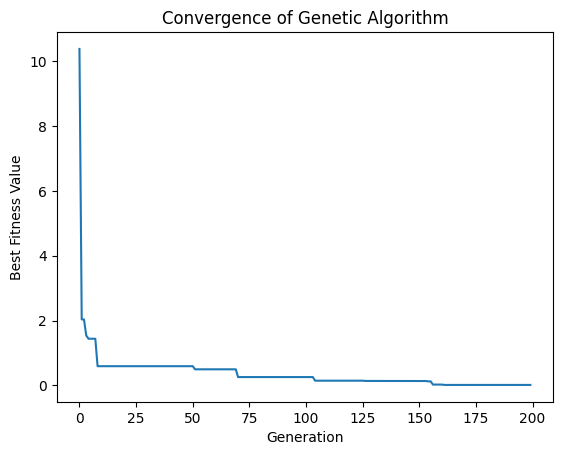

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsinya dioptimasi (fungsi rastrigin)
def rastrigin(X):
    A = 10
    return A * len(X) + sum([(x ** 2 - A * np.cos(2 * np.pi * x)) for x in X])

# Inisialisasi parameter GA
population_size = 100
n_generations = 200
mutation_rate = 0.01
crossover_rate = 0.7
n_genes = 2  # Jumlah dimensinyA

# Inisialisasi populasi
population = np.random.uniform(-5.12, 5.12, (population_size, n_genes))

# Fungsinya seleksi berdasarkan fitness
def select(population, fitness, num_parents):
    parents = np.empty((num_parents, population.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.min(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = population[max_fitness_idx, :]
        fitness[max_fitness_idx] = 99999999
    return parents

# Fungsinya crossover
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)

    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

# Fungsinya mutasi
def mutate(offspring_crossover, mutation_rate):
    for idx in range(offspring_crossover.shape[0]):
        for gene_idx in range(offspring_crossover.shape[1]):
            if np.random.rand() <= mutation_rate:
                random_value = np.random.uniform(-1.0, 1.0, 1)
                offspring_crossover[idx, gene_idx] += random_value
    return offspring_crossover

# Proses GA
best_outputs = []
for generation in range(n_generations):
    fitness = np.array([rastrigin(ind) for ind in population])
    best_outputs.append(np.min(fitness))
    parents = select(population, fitness.copy(), population_size // 2)
    offspring_crossover = crossover(parents, (population_size - parents.shape[0], n_genes))
    offspring_mutation = mutate(offspring_crossover, mutation_rate)
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring_mutation

# Hasil optimasi
best_fitness_idx = np.where(fitness == np.min(fitness))
best_solution = population[best_fitness_idx, :][0][0]
best_solution_fitness = fitness[best_fitness_idx][0]

print(f"Best solution: {best_solution}")
print(f"Best solution fitness: {best_solution_fitness}")

# Plot konvergensi
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Value")
plt.title("Convergence of Genetic Algorithm")
plt.show()
